In [20]:
import tensorflow as tf
import numpy as np
import keras
from keras.datasets import cifar100
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Input
from keras import backend as K
from keras.callbacks import TensorBoard
from keras.optimizers import SGD,Adam
from keras.applications import VGG16
import matplotlib.pylab as plt

### Liberar Memoria de la GPU

In [21]:
cfg = K.tf.ConfigProto()
cfg.gpu_options.allow_growth = True
K.set_session(K.tf.Session(config=cfg))

### Mostrar GPU´s disponibles

In [22]:
from tensorflow.python.client import device_lib
#rint(device_lib.list_local_devices())

### Preparación del Modelo

In [23]:
batch_size = 100
num_classes = 100
epochs = 15

In [24]:
(xt, yt), (xtest, ytest) = cifar100.load_data()

_,filas, columnas, canales = xt.shape

xt = xt.astype('float32')
xtest = xtest.astype('float32')

xt = xt / 255
xtest = xtest / 255  # Normalizar entre 0 y 1

yt = keras.utils.to_categorical(yt, num_classes)
ytest = keras.utils.to_categorical(ytest, num_classes)

### Capas del Modelo

In [25]:
Entradas = Input(shape=(filas, columnas, canales))
x = Conv2D(64, (3, 3), activation='relu', padding='same', name='block1_conv1')(Entradas)
#x=Dropout(0.25)(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same', name='block1_conv2')(x)
x = MaxPooling2D((2, 2), name='block1_pool')(x)

x = Conv2D(128, (3, 3), activation='relu', padding='same', name='block2_conv1')(x)
#x=Dropout(0.25)(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same', name='block2_conv2')(x)
x = MaxPooling2D((2, 2), name='block2_pool')(x)

x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(num_classes, activation='softmax')(x)

### Creación del Modelo

In [26]:
modelo = Model(inputs=Entradas, outputs=x)
modelo.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0         
__________

### Compilación y Entrenamiento

In [27]:
Adam = Adam(lr=0.001,beta_1=0.9,beta_2=0.9) # SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)
modelo.compile(loss=keras.losses.categorical_crossentropy, optimizer=Adam, metrics=['categorical_accuracy'])

In [28]:
# Sacar el historial de entrenamiento
history = modelo.fit(xt, yt, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(xtest,ytest))

Train on 50000 samples, validate on 10000 samples
Epoch 1/15
50000/50000 [==============================] - 11s 227us/step - loss: 3.9974 - categorical_accuracy: 0.0853 - val_loss: 3.4075 - val_categorical_accuracy: 0.1949
Epoch 2/15
50000/50000 [==============================] - 10s 205us/step - loss: 3.2642 - categorical_accuracy: 0.2091 - val_loss: 2.8864 - val_categorical_accuracy: 0.2958
Epoch 3/15
50000/50000 [==============================] - 10s 203us/step - loss: 2.8614 - categorical_accuracy: 0.2857 - val_loss: 2.5697 - val_categorical_accuracy: 0.3495
Epoch 4/15
50000/50000 [==============================] - 10s 207us/step - loss: 2.5792 - categorical_accuracy: 0.3429 - val_loss: 2.3929 - val_categorical_accuracy: 0.3889
Epoch 5/15
50000/50000 [==============================] - 10s 206us/step - loss: 2.3528 - categorical_accuracy: 0.3884 - val_loss: 2.2648 - val_categorical_accuracy: 0.4199
Epoch 6/15
50000/50000 [==============================] - 10s 205us/step - loss: 2.15

### Validación

In [29]:
puntuacion = modelo.evaluate(xtest, ytest, verbose=1)
print(puntuacion)

10000/10000 [==============================] - 1s 93us/step
[2.507634397125244, 0.4594]


### Visualización del Entrenamiento

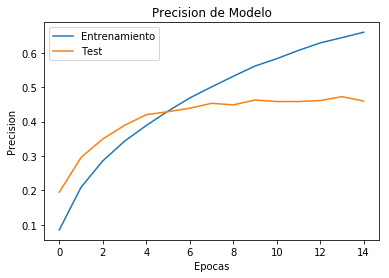

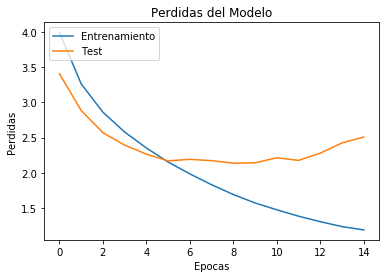

In [30]:
plt.figure(1)
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('Precision de Modelo')
plt.ylabel('Precision')
plt.xlabel('Epocas')
plt.legend(['Entrenamiento', 'Test'], loc='upper left')


plt.figure(2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Perdidas del Modelo')
plt.ylabel('Perdidas')
plt.xlabel('Epocas')
plt.legend(['Entrenamiento', 'Test'], loc='upper left')
plt.show()